In [1]:
#importing necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.__version__

'1.1.3'

In [2]:
df=pd.read_csv('Admission_Prediction.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [7]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [8]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [9]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

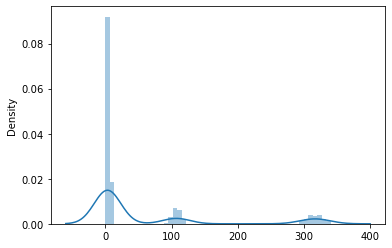

In [10]:
sns.distplot(df)

<AxesSubplot:>

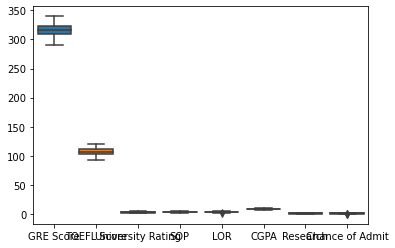

In [11]:
sns.boxplot(data=df)

<AxesSubplot:>

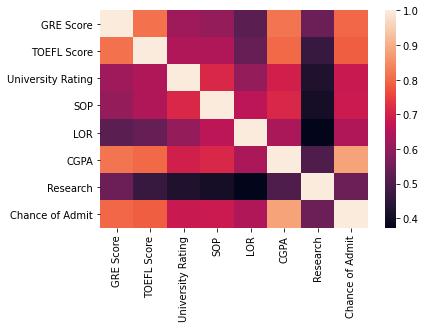

In [12]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(x)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

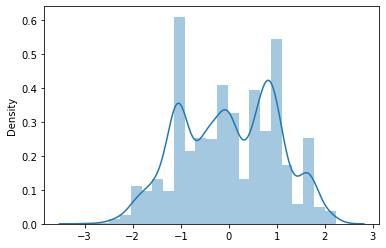

In [10]:
sns.distplot(scaled_data)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.30,random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.score(x_train,y_train)

0.8127490916115427

In [14]:
lr.score(x_test,y_test)

0.834428864104188

In [15]:
y_pred=lr.predict(x_test)

In [16]:
lr.intercept_

0.7181371585897158

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.834428864104188

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0034328386074196416

In [19]:
from sklearn.linear_model import Ridge,Lasso
rr=Ridge(alpha=0.01)
rr.fit(x_train,y_train)
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

0.8127490907050313
0.8344332836290349


In [20]:
ll=Lasso(alpha=0.01)
ll.fit(x_train,y_train)
print(ll.score(x_train,y_train))
print(ll.score(x_test,y_test))

0.8039858617679233
0.8320195072205298


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [22]:
dt.score(x_train,y_train)

1.0

In [23]:
dt.score(x_test,y_test)

0.5571057295654702

In [24]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(dt,x,y,cv=10)
print(a)
print(a.mean())

[0.65353416 0.4569386  0.74239162 0.47688413 0.7190797  0.48976581
 0.51581585 0.62680395 0.84591837 0.52165745]
0.604878964400859


In [40]:
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV 
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [41]:
grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [43]:
#dt_cv.fit(x_train,y_train)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
rf.score(x_train,y_train)

0.9684886212489947

In [46]:
rf.score(x_test,y_test)

0.7928571760833235

In [47]:
a=cross_val_score(rf,x,y,cv=10)
print(a)
print(a.mean())

[0.75016869 0.58613776 0.75756145 0.69824392 0.88591488 0.87037758
 0.72278387 0.78714658 0.88837356 0.79922019]
0.7745928488982303


In [48]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [49]:
ad.score(x_train,y_train)

0.8123497594491658

In [50]:
ad.score(x_test,y_test)

0.7639553726894104

In [51]:
import xgboost as xg
xgb=xg.XGBRegressor(objective='reg:linear',n_estimators=10,seed=0)
xgb.fit(x_train,y_train)

[23:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
xgb.score(x_train,y_train)

0.9582852657167483

In [53]:
xgb.score(x_test,y_test)

0.7757779228382989

In [54]:
#a=cross_val_score(xgb,x,y,cv=10)
#print(a)
#print(a.mean())

In [55]:
from sklearn.svm import SVR
sup_vec=SVR()
sup_vec.fit(x_train,y_train)

SVR()

In [56]:
sup_vec.score(x_train,y_train)

0.7879498834093065

In [57]:
sup_vec.score(x_test,y_test)

0.7026827629911212

In [58]:
a=cross_val_score(sup_vec,x,y,cv=10)
print(a)
print(a.mean())

[0.59064201 0.46257586 0.76465818 0.53870206 0.68717494 0.66297126
 0.70255736 0.70872469 0.66855607 0.76670655]
0.655326897860036
